In [1]:
!gzip -d driveby_broadcast_serial.pkl.gz
!gzip -d driveby_broadcast_parallel.pkl.gz

In [1]:
import pickle
import numpy as np

In [2]:
serial_dicts = pickle.load(open('driveby_broadcast_serial.pkl', 'rb'))
multiprocess_dicts = pickle.load(open('driveby_broadcast_parallel.pkl', 'rb'))

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

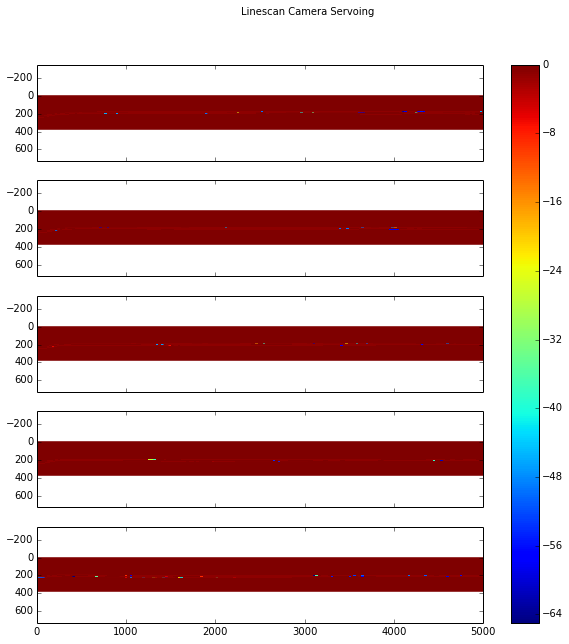

In [4]:
fig, axes = plt.subplots(nrows=5,
                         ncols=1,
                         sharex=True,
                         sharey=True,
                         figsize=(10, 10))
for i in xrange(len(axes)):
    im = axes[i].imshow(serial_dicts[i]['images'].T)
cax, kw = mpl.colorbar.make_axes([ax for ax in axes.flat])
plt.colorbar(im, cax=cax)
fig.suptitle('Linescan Camera Servoing')

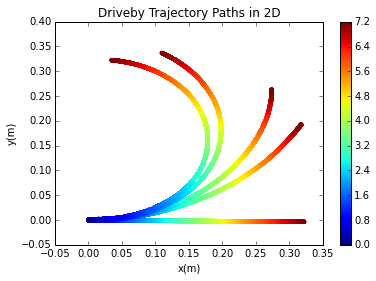

In [5]:
for dic in serial_dicts:
    traj = dic['traj']
    plt.scatter(traj.T[1],
                traj.T[2],
               linewidths=0,
               c=traj.T[0])
plt.colorbar() # Color is time.
plt.title('Driveby Trajectory Paths in 2D')
plt.xlabel('x(m)')
plt.ylabel('y(m)')

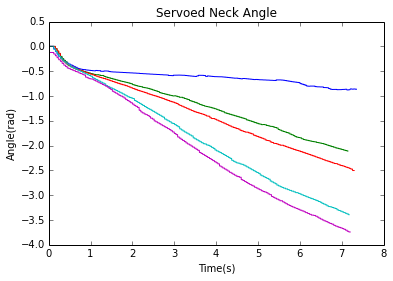

In [6]:
for dic in serial_dicts:
    traj = dic['traj']
    plt.plot(traj.T[0], np.unwrap(traj.T[3]))
plt.title('Servoed Neck Angle')
plt.xlabel('Time(s)')
plt.ylabel('Angle(rad)')

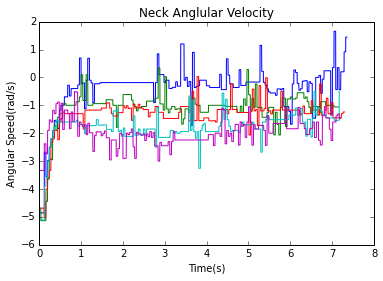

In [7]:
for dic in serial_dicts:
    traj = dic['traj']
    plt.plot(traj.T[0], traj.T[4])
plt.title('Neck Anglular Velocity')
plt.xlabel('Time(s)')
plt.ylabel('Angular Speed(rad/s)')

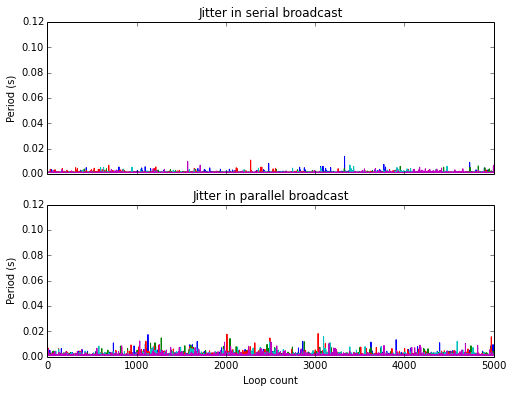

In [8]:
fig, axes = plt.subplots(nrows=2,
                         ncols=1,
                         sharex=True,
                         sharey=True,
                         figsize=(8, 6))
serial_diffs = np.array([np.diff(dic['traj'].T[0]) for dic in serial_dicts])
parr_diffs = np.array([np.diff(dic['traj'].T[0]) for dic in multiprocess_dicts])

ax = axes[0]
for diff in serial_diffs:
    axes[0].plot(diff)
    axes[0].set_title('Jitter in serial broadcast')
    axes[0].set_ylabel('Period (s)')
for diff in parr_diffs:
    axes[1].plot(diff)
    axes[1].set_title('Jitter in parallel broadcast')
    axes[1].set_xlabel('Loop count')
    axes[1].set_ylabel('Period (s)')

(0, 0.005)

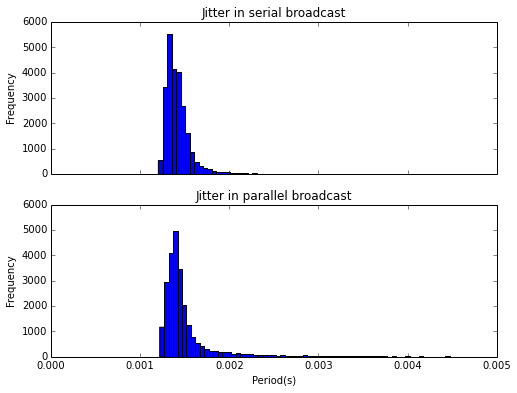

In [12]:
fig, axes = plt.subplots(nrows=2,
                         ncols=1,
                         sharex=True,
                         sharey=True,
                         figsize=(8, 6))
serial_diffs = np.array([np.diff(dic['traj'].T[0]) for dic in serial_dicts])
parr_diffs = np.array([np.diff(dic['traj'].T[0]) for dic in multiprocess_dicts])

binwidth = .00005
allsdiffs = serial_diffs.flatten()
axes[0].hist(allsdiffs, bins=np.arange(min(allsdiffs),
                                max(allsdiffs) + binwidth, binwidth))
axes[0].set_title('Jitter in serial broadcast')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim([0, .005])

allpdiffs = parr_diffs.flatten()
axes[1].hist(allpdiffs, bins=np.arange(min(allpdiffs),
                                max(allpdiffs) + binwidth, binwidth))
axes[1].set_title('Jitter in parallel broadcast')
axes[1].set_xlabel('Period(s)')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim([0, .005])